<a href="https://colab.research.google.com/github/Jdzubina/Python---Data-and-AI/blob/main/Colab_Notebook_4_JosephDzubina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Trees**

A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It models decisions and their possible consequences as a tree-like graph of decisions. The tree consists of a root node, decision nodes, and leaf nodes. The root node represents the entire dataset, decision nodes represent the choices or splits made based on attributes, and leaf nodes represent the final decision or predicted outcome.



**Code Sample - Electrical Power Output**

In [ ]:
# Import the modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [ ]:
# Read Data
filename = 'Folds5x2_pp.xlsx'
df = pd.read_excel(filename, sheet_name='Sheet1')
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
# Preprocess the data and split in test/train
X, Y = df[['AT', 'V','AP','RH']], df['PE']
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
target_scaler = MinMaxScaler()
Y_new = target_scaler.fit_transform(Y.values.reshape(-1,1))
X_train, X_test, Y_train, y_test = \
  train_test_split(X_new, Y_new, test_size=0.4, random_state=333)

In [ ]:
# Define the decision tree regressor
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
# Make the prediction over the test data
Y_pred = model.predict(np.float32(X_test))

In [ ]:
# Print R-Square Value
print("R2 Score is {} and MSE {}".format(\
       r2_score(y_test, Y_pred),\
       mean_squared_error(y_test, Y_pred)))

R2 Score is 0.9077326633644909 and MSE 0.0047488583618438655


Text(0, 0.5, 'Predicted Net Hourly Electrical Energy Output (MW)')

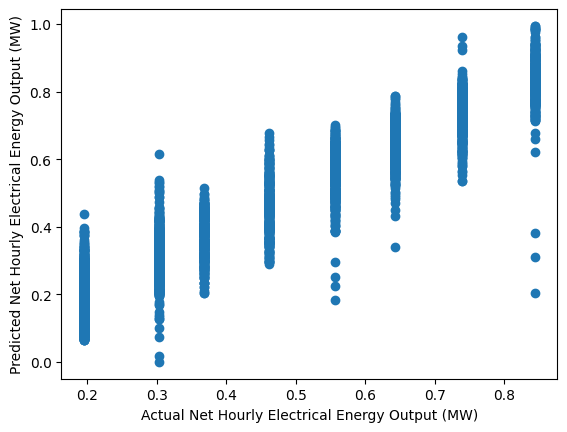

In [ ]:
# Display Scatter Plot
plt.scatter(Y_pred, y_test)
plt.xlabel("Actual Net Hourly Electrical Energy Output (MW)")
plt.ylabel("Predicted Net Hourly Electrical Energy Output (MW)")

**Code Sample - Wine Quality**

In [ ]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier  # The decision tree Classifier from Scikit
import seaborn as sns
%matplotlib inline

In [ ]:
# Read Data
filename = 'winequality-red.csv'
df = pd.read_csv(filename, sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Organizes counts into each categories
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [ ]:
#categorize wine quality in three levels
bins = (0,3.5,5.5,10)
categories = pd.cut(df['quality'], bins, labels = ['bad','ok','good'])
df['quality'] = categories

In [ ]:
c

quality
good    855
ok      734
bad      10
Name: count, dtype: int64

In [ ]:
# Preprocessing and splitting data to X and y
X = df.drop(['quality'], axis = 1)
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
y = df['quality']
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 323)

In [ ]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)
#Predicting the Test Set
y_pred = classifier.predict(X_test)

<Axes: >

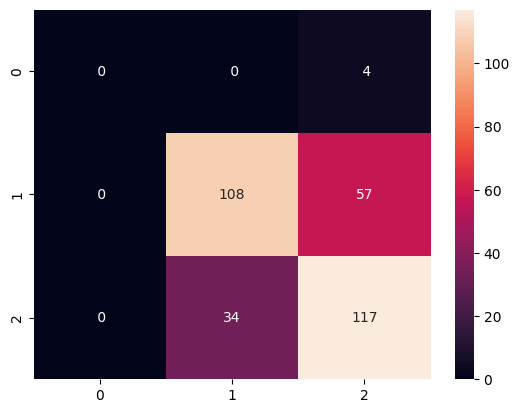

In [ ]:
# Display heat map
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [ ]:
# Print Accuracy
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

Accuracy is 0.703125


**Use Cases**

Decision trees can be used to power marketing campaigns. Companies use Decision Trees to determine the best audience for their marketing campaigns. The tree might ask questions like, "Is the customer of a certain demographic?", "Has the customer bought similar products before?", or "Does the customer respond to email offers?". Each answer helps to segment the audience and decide who should receive the marketing materials, increasing the chances of a successful campaign.

HubSpot. (n.d.). Decision tree: How to make, examples, and tools. HubSpot Blog.  https://blog.hubspot.com/marketing/decision-tree

**My Experience Using This Tool**

This was my first time exploring decision trees. For the electrical power output dataset, I began by importing essential libraries and reading datasets into pandas DataFrames. I Then preprocessed the data, scaled the features, and split it into training and testing sets.

I understand that splitting the data set is important to have a reference to refer to later to validate the model's performance. I couldn't quite grasp how R-squared is used to evaluate the models outputs. It's something I want to learn more about.

I have a good understanding of how to organizes counts into each categories using the value_counts method. Visualizing the results with scatter plots and heat maps was tricky but after some practice I've learned how to create them and it helped me understand some of the relations between data points. I think I've got a solid understand of how to create these visualizations in the future.


**Ensemble learning**

Ensemble learning is a machine learning technique where multiple models are trained to solve the same problem and combined to get better results. The idea is that by combining multiple models, the ensemble can achieve higher predictive performance than any single model. Common methods include bagging, boosting, and stacking. Bagging involves training the same algorithm multiple times on different subsets of the data, while boosting sequentially trains models, each trying to correct its predecessor's errors. Ensemble learning leverages the wisdom of the crowd, akin to taking advice from multiple experts rather than relying on a single opinion.

Code Sample

In [ ]:
# import the different classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
# Declare each classifier
clf1 = SVC(random_state=22)
clf2 = DecisionTreeClassifier(random_state=23)
clf3 = GaussianNB()

In [ ]:
# Prepare training data
X = np.array(X_train)
y = np.array(y_train)

In [ ]:
# Employ Ensemble Learning
eclf = VotingClassifier(estimators=[
    ('svc', clf1), ('dt', clf2), ('gnb', clf3)], voting='hard')
eclf = eclf.fit(X, y)

In [ ]:
# Make predictions on test data
y_pred = eclf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [ ]:
# Evaluate the accuracy
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

Accuracy is 0.721875


**Bagging and Pasting**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_classifier = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, max_samples=1000,
    bootstrap=True, n_jobs=-1)
bag_classifier.fit(X_train, y_train)
y_pred = bag_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
# Evaluate the accuracy
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

Accuracy is 0.778125


**Cross Validation**

Helps to reduce overfitting. Overfitting occurs when a machine learning model learns the details and noise in the training data to such an extent that it negatively impacts the performance of the model on new data. This means that the model is too closely fitted to the specific details of the training data, capturing noise and outliers rather than the underlying patterns.

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train,\
 y = y_train, cv = 10)
print("Accuracy Mean {} Accuracy Variance \
 {}".format(accuracies.mean(),accuracies.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Accuracy Mean 0.7239603838582677 Accuracy Variance  0.028236533132518955


**Use Cases**

One use case for ensemble learning is identifying suspicious login attempts in an identity management system. This is something I'm learning about at the company I'm working at currently, Okta.

In access and identity management, ensemble learning could be used to detect and prevent unauthorized login attempts to ensure the security of users and systems. Suspicious login attempts can include actions such as logging in from unusual locations, networks, using unusual devices, or exhibiting behavior that deviates from the user's normal patterns (like logging in from a country from across the world). Ensemble learning can be used to detect unusual activity patterns and "step up" authentication. For example, under normal behavior a user could log in with biometics, but if unusual activity is detected it may step the user up to second factor authentication.

**My Experience Using This Tool**

I found ensemble learning fairly easy to set up. I can do a lot with very little code. The process involved training individual models like Random Forest, SVM, and Logistic Regression, which was a new experience for me. I created a cross-validation to help reduce overfitting, which occurs when a model learns the noise in the training data too well, negatively impacting its performance on new data.